In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('diabetes.csv')

label_encoder = LabelEncoder()
encoded_gender = label_encoder.fit_transform(data['gender'])
encoded_smoking = label_encoder.fit_transform(data['smoking_history'])

data['encoded_smoking_history'] = encoded_smoking
data['encoded_gender'] = encoded_gender

X = data[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level', 'encoded_gender', 'encoded_smoking_history']]
y = data['diabetes']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [20]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    
    for _ in range(num_iterations):
        predictions = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (predictions - y)) / m
        theta -= learning_rate * gradient
        
    return theta

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
num_features = X_train.shape[1]
theta = np.zeros(num_features)

learning_rate = 0.01
num_iterations = 1000

theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

y_pred = np.round(sigmoid(np.dot(X_test, theta)))

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy -> {accuracy*100}%")

Accuracy -> 91.46%


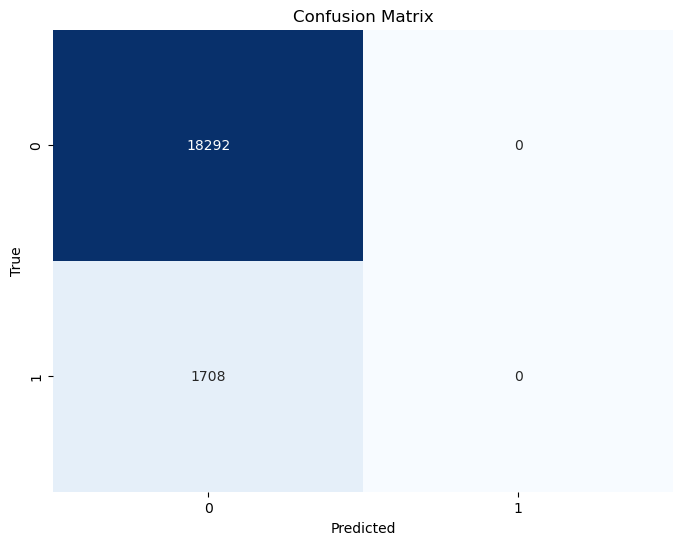

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()